In [1]:
import os
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
import h5py

In [4]:
adatas = [x for x in os.listdir('/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/data/') if x.endswith('cleaned.h5ad')]

In [5]:
adatas

['2054_00_cleaned.h5ad',
 '2060_41_cleaned.h5ad',
 '2070_00_cleaned.h5ad',
 '2072_00_cleaned.h5ad',
 '2074_00_cleaned.h5ad',
 '2075_00_cleaned.h5ad',
 '2094_01_cleaned.h5ad',
 'S14_00_cleaned.h5ad',
 'S15_00_cleaned.h5ad',
 'S16_00_cleaned.h5ad',
 'S17_00_cleaned.h5ad']

In [6]:
def load_it(adata):
    samp = adata.split('_')[0]
    days = adata.split('_')[1]
    adata = sc.read_h5ad('/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/data/' + adata)
    adata.obs['Patient'] = samp
    adata.obs['Days'] = days
    adata.obs['Sample'] = adata.obs['Patient'] + '_' + adata.obs['Days']
    adata.obs.index = adata.obs.index + '-' + samp + '_' + days
    return adata

In [7]:
adatas = [load_it(ad) for ad in adatas]

In [8]:
adatas

[AnnData object with n_obs × n_vars = 4484 × 37143
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA3', 'nFeature_RNA3', 'Patient', 'Days', 'Sample'
     var: 'features',
 AnnData object with n_obs × n_vars = 2933 × 37143
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA3', 'nFeature_RNA3', 'Patient', 'Days', 'Sample'
     var: 'features',
 AnnData object with n_obs × n_vars = 3689 × 37143
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA3', 'nFeature_RNA3', 'Patient', 'Days', 'Sample'
     var: 'features',
 AnnData object with n_obs × n_vars = 5996 × 37143
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA3', 'nFeature_RNA3', 'Patient', 'Days', 'Sample'
     var: 'features',
 AnnData object with n_obs × n_vars = 5620 × 37143
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA3', 'nFeature_RNA3', 'Patient', 'Days', 'Sample'
     var: 'features',
 AnnData object with n_obs × n_vars = 3047 × 37143
     obs: 'ori

In [9]:
def qc(adata):
    sc.pp.filter_cells(adata, min_genes = 10)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
    adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True)
    
    remove = ['total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 
          'log1p_total_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'nCount_RNA3', 'nFeature_RNA3', 'orig.ident', 'nCount_RNA', 'nFeature_RNA']
    adata.obs = adata.obs[[x for x in adata.obs.columns if x not in remove]]
    return adata

In [10]:
adatas = [qc(ad) for ad in adatas]

In [11]:
df = pd.concat([x.obs for x in adatas])

In [12]:
adatas

[AnnData object with n_obs × n_vars = 4287 × 37143
     obs: 'Patient', 'Days', 'Sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
     var: 'features', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
 AnnData object with n_obs × n_vars = 2177 × 37143
     obs: 'Patient', 'Days', 'Sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
     var: 'features', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
 AnnData object with n_obs × n_vars = 3520 × 37143
     obs: 'Patient', 'Days', 'Sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_b

In [13]:
print(df)

                                   Patient Days   Sample  n_genes  \
AAACAAGCATTTGGAGAGTGAGTG-1-2054_00    2054   00  2054_00       45   
AAACCAATCGCTTGACAGTGAGTG-1-2054_00    2054   00  2054_00       54   
AAACCAATCGGGCAGTAGTGAGTG-1-2054_00    2054   00  2054_00       49   
AAACCAGGTGCTGATTAGTGAGTG-1-2054_00    2054   00  2054_00       90   
AAACCAGGTTCTCAAAAGTGAGTG-1-2054_00    2054   00  2054_00       54   
...                                    ...  ...      ...      ...   
TTTGGCGGTGGGTGTGATGTTGAC-1-S17_00      S17   00   S17_00      383   
TTTGGCGGTTCCTTTGATGTTGAC-1-S17_00      S17   00   S17_00       38   
TTTGTGAGTAATTGCCATGTTGAC-1-S17_00      S17   00   S17_00      378   
TTTGTGAGTGGTTAAGATGTTGAC-1-S17_00      S17   00   S17_00       41   
TTTGTGAGTGGTTCTGATGTTGAC-1-S17_00      S17   00   S17_00      183   

                                    n_genes_by_counts  \
AAACAAGCATTTGGAGAGTGAGTG-1-2054_00                 45   
AAACCAATCGCTTGACAGTGAGTG-1-2054_00                 54   


In [14]:
df = df.sort_values('Sample')

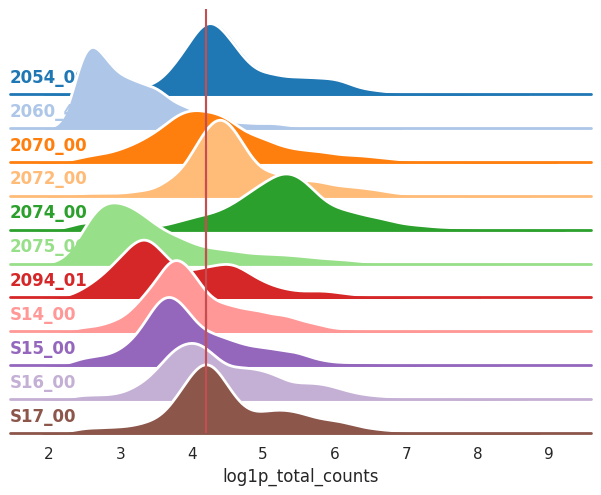

In [15]:
#value = "pct_counts_mt"
#value = "n_genes"
#value = 'pct_counts_in_top_20_genes'
value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="Sample", hue="Sample", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

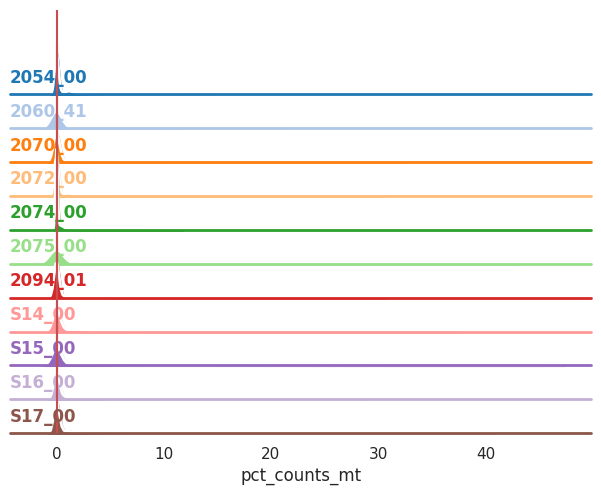

In [16]:
value = "pct_counts_mt"
#value = "n_genes"
#value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="Sample", hue="Sample", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

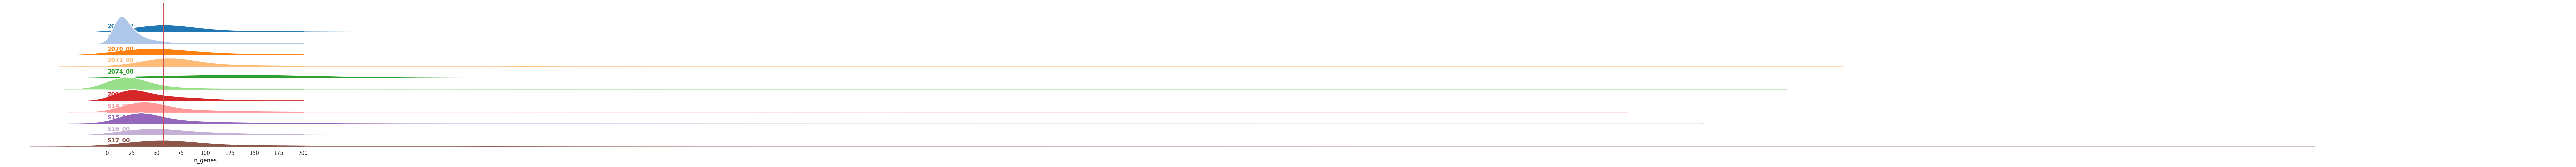

In [17]:
#value = "pct_counts_mt"
value = "n_genes"
#value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="Sample", hue="Sample", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlim=(0, 200))
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

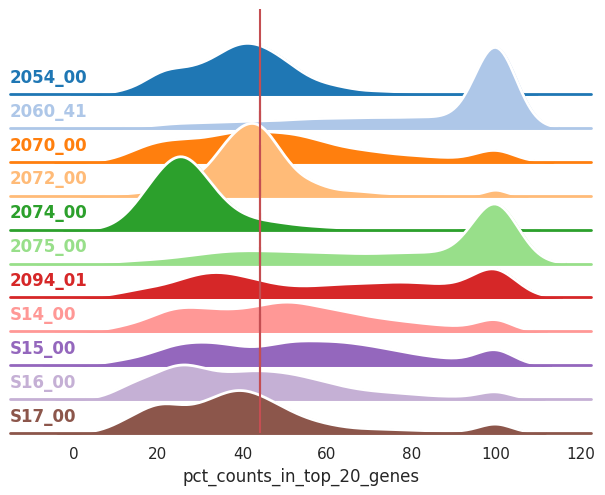

In [18]:
#value = "pct_counts_mt"
#value = "n_genes"
value = 'pct_counts_in_top_20_genes'
#value = "log1p_total_counts"

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row="Sample", hue="Sample", aspect=15, height=0.5, palette="tab20")

g.map(sns.kdeplot, value, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, value, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, value)

g.figure.subplots_adjust(hspace=-.6)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.axvline(x=df[value].median(), color='r', linestyle='-')


plt.show()

In [19]:
df

,Patient,Days,Sample,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb
AAACAAGCATTTGGAGAGTGAGTG-1-2054_00,2054,00,2054_00,45,45,3.828641,49.0,3.912023,48.979592,0.000000,0.0,0.000000
GGGATATTCCTGAGGAAGTGAGTG-1-2054_00,2054,00,2054_00,87,87,4.477337,100.0,4.615121,33.000000,0.000000,0.0,0.000000
GGGATATTCGGTACCTAGTGAGTG-1-2054_00,2054,00,2054_00,41,41,3.737670,44.0,3.806662,52.272727,0.000000,0.0,0.000000
GGGATATTCTCCATCTAGTGAGTG-1-2054_00,2054,00,2054_00,242,242,5.493061,349.0,5.857933,26.647564,0.000000,0.0,0.000000
GGGATATTCTTGAATCAGTGAGTG-1-2054_00,2054,00,2054_00,298,298,5.700444,436.0,6.079933,24.541284,0.229358,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
CCGCATTAGTGATGGTATGTTGAC-1-S17_00,S17,00,S17_00,70,70,4.262680,75.0,4.330733,33.333333,0.000000,0.0,1.333333
CCGCCATCAAATAGGAATGTTGAC-1-S17_00,S17,00,S17_00,244,244,5.501258,301.0,5.710427,18.936877,0.000000,0.0,0.000000
CCGCCATCAAGGCCATATGTTGAC-1-S17_00,S17,00,S17_00,17,17,2.890372,17.0,2.890372,100.000000,0.000000,0.0,0.000000
CCCTTGCTCCCACATAATGTTGAC-1-S17_00,S17,00,S17_00,16,16,2.833213,17.0,2.890372,100.000000,0.000000,0.0,0.000000


Preprocessing

In [20]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi

In [21]:
#!pip install celltypist scvi-tools hyperopt "ray[tune]" anndata2ri

In [22]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)


In [23]:
import celltypist
from celltypist import models

In [24]:
#models.get_all_models()

In [28]:
import os
import scanpy as sc
import pandas as pd

rdatas = []
for dem in [x for x in os.listdir('/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/ref_data/') if 'dem' in x]:
    basename = dem.split('.')[0]
    samp = basename.split('_')[1]  # Extract the sample part (e.g., "AML1012-D0")

    # Debugging output
    print(f"Processing DEM file: {dem}")
    print(f"Extracted sample: {samp}")

    # Find the corresponding annotation file
    anno_files = [x for x in os.listdir('/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/ref_data/') if samp in x and 'anno' in x]
    
    if anno_files:
        anno = anno_files[0]  # Use the first match
        print(f"Found annotation file: {anno}")
    else:
        print(f"No annotation file found for sample: {samp}")
        continue  # Skip this iteration if no annotation file is found

    # Load the DEM data and annotation
    temp_data = sc.read_text('/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/ref_data/' + dem).T
    temp_anno = pd.read_table('/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/ref_data/' + anno, index_col=0)[['CellType']]

    # Merge the annotation data with the DEM data
    temp_data.obs = temp_data.obs.merge(right=temp_anno, left_index=True, right_index=True)

    # Add the ID (basename) to the obs data
    temp_data.obs['ID'] = basename

    # Append to rdatas
    rdatas.append(temp_data)


Processing DEM file: GSM3587923_AML1012-D0.dem.txt.gz
Extracted sample: AML1012-D0
Found annotation file: GSM3587924_AML1012-D0.anno.txt.gz
Processing DEM file: GSM3587925_AML210A-D0.dem.txt.gz
Extracted sample: AML210A-D0
Found annotation file: GSM3587926_AML210A-D0.anno.txt.gz
Processing DEM file: GSM3587927_AML314-D0.dem.txt.gz
Extracted sample: AML314-D0
Found annotation file: GSM3587928_AML314-D0.anno.txt.gz
Processing DEM file: GSM3587929_AML314-D31.dem.txt.gz
Extracted sample: AML314-D31
Found annotation file: GSM3587930_AML314-D31.anno.txt.gz
Processing DEM file: GSM3587931_AML328-D0.dem.txt.gz
Extracted sample: AML328-D0
Found annotation file: GSM3587932_AML328-D0.anno.txt.gz
Processing DEM file: GSM3587933_AML328-D113.dem.txt.gz
Extracted sample: AML328-D113
Found annotation file: GSM3587934_AML328-D113.anno.txt.gz
Processing DEM file: GSM3587935_AML328-D171.dem.txt.gz
Extracted sample: AML328-D171
Found annotation file: GSM3587936_AML328-D171.anno.txt.gz
Processing DEM file:

In [29]:
for i, data in enumerate(rdatas):
    print(f"Data for sample {i}:")
    print(data)


Data for sample 0:
AnnData object with n_obs × n_vars = 1136 × 27899
    obs: 'CellType', 'ID'
Data for sample 1:
AnnData object with n_obs × n_vars = 748 × 27899
    obs: 'CellType', 'ID'
Data for sample 2:
AnnData object with n_obs × n_vars = 162 × 27899
    obs: 'CellType', 'ID'
Data for sample 3:
AnnData object with n_obs × n_vars = 346 × 27899
    obs: 'CellType', 'ID'
Data for sample 4:
AnnData object with n_obs × n_vars = 1094 × 27899
    obs: 'CellType', 'ID'
Data for sample 5:
AnnData object with n_obs × n_vars = 2029 × 27899
    obs: 'CellType', 'ID'
Data for sample 6:
AnnData object with n_obs × n_vars = 1402 × 27899
    obs: 'CellType', 'ID'
Data for sample 7:
AnnData object with n_obs × n_vars = 1880 × 27899
    obs: 'CellType', 'ID'
Data for sample 8:
AnnData object with n_obs × n_vars = 525 × 27899
    obs: 'CellType', 'ID'
Data for sample 9:
AnnData object with n_obs × n_vars = 953 × 27899
    obs: 'CellType', 'ID'
Data for sample 10:
AnnData object with n_obs × n_vars 

In [30]:
rdata = sc.concat(rdatas)

In [31]:
rdata.obs.groupby('CellType').size()

CellType
B                520
CTL             1338
GMP              918
GMP-like        3055
HSC             1709
HSC-like        1979
Mono            2758
Mono-like       2655
NK              1969
Plasma          1146
ProB             298
ProMono         1146
ProMono-like    1917
Prog            1709
Prog-like       4438
T               7105
cDC              849
cDC-like        2125
earlyEry        1119
lateEry         1329
pDC              225
dtype: int64

In [32]:
sc.pp.filter_genes(rdata, min_cells = 10)

In [33]:
sc.pp.normalize_total(rdata, target_sum = 1e4) #Note this is only for cell annotation, recommended by authors but not best
sc.pp.log1p(rdata)

In [34]:
rdata.obs

,CellType,ID
AML1012-D0_AAAAAGTTACGT,GMP,GSM3587923_AML1012-D0
AML1012-D0_AAAACACCAATC,GMP-like,GSM3587923_AML1012-D0
AML1012-D0_AAAATAGCCTTT,Prog-like,GSM3587923_AML1012-D0
AML1012-D0_AAACATTAAACG,ProMono-like,GSM3587923_AML1012-D0
AML1012-D0_AAACCACGTGCN,Prog-like,GSM3587923_AML1012-D0
...,...,...
OCI-AML3_TTTGAGCCAACC,GMP-like,GSM3588005_OCI-AML3
OCI-AML3_TTTGCCACAGGC,ProMono-like,GSM3588005_OCI-AML3
OCI-AML3_TTTTATGAATTN,GMP-like,GSM3588005_OCI-AML3
OCI-AML3_TTTTGACTTTTN,GMP-like,GSM3588005_OCI-AML3


In [35]:
rdata = rdata[~rdata.obs.CellType.isna()]

In [36]:
rdata

View of AnnData object with n_obs × n_vars = 40307 × 19616
    obs: 'CellType', 'ID'
    var: 'n_cells'
    uns: 'log1p'

In [ ]:
#ref_model = celltypist.train(rdata, labels = 'CellType', n_jobs = 22,
#                            use_SGD = False,
#                            feature_selection = True, top_genes = 300)

In [ ]:
#ref_model.write('/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/ref_data/models/ref.pkl')

In [37]:
ref_model = models.Model.load(model="/mnt/c/Users/ethan/OneDrive/桌面/sc1186deepseq/ref_data/models/ref.pkl")

In [38]:
model_low = models.Model.load(model="Immune_All_Low.pkl")

In [39]:
def predict_cells(adata):
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.normalize_total(adata, target_sum=1e4) #not recommended for typical pp
    sc.pp.log1p(adata)

    adata.X = adata.X.toarray()

    predictions = celltypist.annotate(adata, model=model_low, majority_voting=False)
    predictions_adata = predictions.to_adata()
    adata.obs["low_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
    adata.obs["low_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]

    predictions = celltypist.annotate(adata, model=ref_model, majority_voting=False)
    predictions_adata = predictions.to_adata()
    adata.obs["ref_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
    adata.obs["ref_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]

    return adata.obs

In [40]:
#adatas = [sc.read_h5ad('pp_adata/' + x) for x in os.listdir('pp_adata')]

In [41]:
adatas

[AnnData object with n_obs × n_vars = 4287 × 37143
     obs: 'Patient', 'Days', 'Sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
     var: 'features', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
 AnnData object with n_obs × n_vars = 2177 × 37143
     obs: 'Patient', 'Days', 'Sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'
     var: 'features', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
 AnnData object with n_obs × n_vars = 3520 × 37143
     obs: 'Patient', 'Days', 'Sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_b

In [42]:
len(adatas)

11

In [43]:
predictions = [predict_cells(ad.copy()) for ad in adatas]

🔬 Input data has 4287 cells and 6152 genes
🔗 Matching reference genes in the model
🧬 2298 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 4287 cells and 6152 genes
🔗 Matching reference genes in the model
🧬 1337 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 2177 cells and 1424 genes
🔗 Matching reference genes in the model
🧬 714 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 2177 cells and 1424 genes
🔗 Matching reference genes in the model
🧬 471 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 3520 cells and 5944 genes
🔗 Matching reference genes in the model
🧬 2239 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 3520 cells and 5944 genes
🔗 Matching reference genes in the model
🧬 1319 feature

In [44]:
predictions = pd.concat(predictions)[['low_label', 'low_score', 'ref_label', 'ref_score']]

predictions

,low_label,low_score,ref_label,ref_score
AAACAAGCATTTGGAGAGTGAGTG-1-2054_00,Alveolar macrophages,0.033422,HSC,0.959079
AAACCAATCGCTTGACAGTGAGTG-1-2054_00,Memory B cells,0.069340,Prog-like,0.006366
AAACCAATCGGGCAGTAGTGAGTG-1-2054_00,Tcm/Naive helper T cells,0.578305,HSC,0.000890
AAACCAGGTGCTGATTAGTGAGTG-1-2054_00,Tcm/Naive helper T cells,0.688201,Mono,0.968169
AAACCAGGTTCTCAAAAGTGAGTG-1-2054_00,Classical monocytes,0.023848,Mono,0.999997
...,...,...,...,...
TTTGGCGGTGGGTGTGATGTTGAC-1-S17_00,Tcm/Naive helper T cells,0.135763,T,0.998427
TTTGGCGGTTCCTTTGATGTTGAC-1-S17_00,Classical monocytes,0.274351,Mono-like,0.220773
TTTGTGAGTAATTGCCATGTTGAC-1-S17_00,NK cells,0.064383,NK,0.998342
TTTGTGAGTGGTTAAGATGTTGAC-1-S17_00,Tcm/Naive helper T cells,0.136261,Prog-like,0.001025


In [45]:
adata = sc.concat(adatas)

In [46]:
predictions.to_csv('PREDICTIONS.csv')

In [49]:
adata

AnnData object with n_obs × n_vars = 51462 × 37143
    obs: 'Patient', 'Days', 'Sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'

In [50]:
adata.obs

,Patient,Days,Sample,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb
AAACAAGCATTTGGAGAGTGAGTG-1-2054_00,2054,00,2054_00,45,45,3.828641,49.0,3.912023,48.979592,0.000000,0.0,0.0
AAACCAATCGCTTGACAGTGAGTG-1-2054_00,2054,00,2054_00,54,54,4.007333,63.0,4.158883,46.031746,0.000000,0.0,0.0
AAACCAATCGGGCAGTAGTGAGTG-1-2054_00,2054,00,2054_00,49,49,3.912023,56.0,4.043051,48.214286,0.000000,0.0,0.0
AAACCAGGTGCTGATTAGTGAGTG-1-2054_00,2054,00,2054_00,90,90,4.510860,115.0,4.753590,39.130435,0.000000,0.0,0.0
AAACCAGGTTCTCAAAAGTGAGTG-1-2054_00,2054,00,2054_00,54,54,4.007333,61.0,4.127134,44.262295,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGCGGTGGGTGTGATGTTGAC-1-S17_00,S17,00,S17_00,383,383,5.950643,459.0,6.131226,11.546841,0.000000,0.0,0.0
TTTGGCGGTTCCTTTGATGTTGAC-1-S17_00,S17,00,S17_00,38,38,3.663562,42.0,3.761200,57.142857,0.000000,0.0,0.0
TTTGTGAGTAATTGCCATGTTGAC-1-S17_00,S17,00,S17_00,378,378,5.937536,450.0,6.111467,13.333333,0.222222,0.0,0.0
TTTGTGAGTGGTTAAGATGTTGAC-1-S17_00,S17,00,S17_00,41,41,3.737670,46.0,3.850148,54.347826,0.000000,0.0,0.0


scVI label transfer

to be added...

Integration

In [52]:
from scvi.autotune import ModelTuner
from ray import tune

In [59]:
sc.pp.filter_genes(adata, min_cells = 50)

In [60]:
adata

AnnData object with n_obs × n_vars = 51462 × 8705
    obs: 'Patient', 'Days', 'Sample', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'CellType', 'Batch'
    var: 'n_cells'

In [63]:
model_cls = scvi.model.SCVI
model_cls.setup_anndata(adata, categorical_covariate_keys = ['Sample'],
                             continuous_covariate_keys=['pct_counts_mt', 'pct_counts_ribo'])

tuner = ModelTuner(model_cls)

In [ ]:
#!pip install --upgrade "jax[cuda11_cudnn82]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

In [64]:
tuner.info()

ModelTuner registry for SCVI

                  Tunable hyperparameters                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃      Hyperparameter      ┃ Default value ┃    Source    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│         n_hidden         │      128      │     VAE      │
│         n_latent         │      10       │     VAE      │
│         n_layers         │       1       │     VAE      │
│       dropout_rate       │      0.1      │     VAE      │
│        dispersion        │     gene      │     VAE      │
│     log_variational      │     True      │     VAE      │
│     gene_likelihood      │     zinb      │     VAE      │
│   latent_distribution    │    normal     │     VAE      │
│    encode_covariates     │     False     │     VAE      │
│ deeply_inject_covariates │     True      │     VAE      │
│      use_batch_norm      │     both      │     VAE      │
│      use_layer_norm      │     none      │     VAE      │
│  use_observed_lib_size   │     True      │     VAE      │
│      var_activation      │     None      │     VAE      │
│        optimizer         │     Adam      │ TrainingPlan │
│            lr            │     0.001     │ TrainingPlan │
│       weight_decay       │     1e-06     │ TrainingPlan │
│           eps            │     0.01      │ TrainingPlan │
│    n_steps_kl_warmup     │     None      │ TrainingPlan │
│    n_epochs_kl_warmup    │      400      │ TrainingPlan │
│   reduce_lr_on_plateau   │     False     │ TrainingPlan │
│        lr_factor         │      0.6      │ TrainingPlan │
│       lr_patience        │      30       │ TrainingPlan │
│       lr_threshold       │      0.0      │ TrainingPlan │
│          lr_min          │       0       │ TrainingPlan │
│      max_kl_weight       │      1.0      │ TrainingPlan │
│      min_kl_weight       │      0.0      │ TrainingPlan │
│        batch_size        │      128      │     SCVI     │
└──────────────────────────┴───────────────┴──────────────┘

       Available metrics        
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃     Metric      ┃    Mode    ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ validation_loss │    min     │
└─────────────────┴────────────┘

                         Default search space                         
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Hyperparameter ┃ Sample function ┃  Arguments  ┃ Keyword arguments ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│    n_hidden    │     choice      │ [[64, 128]] │        {}         │
└────────────────┴─────────────────┴─────────────┴───────────────────┘

In [65]:
search_space = {
    "n_hidden": tune.choice([92, 128, 192, 256]),
    "n_latent": tune.choice([10, 20, 30, 40, 50, 60]),
    "n_layers": tune.choice([1, 2, 3]),
    "lr": tune.loguniform(1e-4, 1e-2),
    "gene_likelihood": tune.choice(["nb", "zinb"])}

In [ ]:
results = tuner.fit(adata, metric="validation_loss",
                    resources = {'gpu': 1}, #have to specify gpu or might not use
                    search_space = search_space,
                   num_samples = 100,
                   max_epochs = 20)

2024-09-16 23:25:07,457	INFO worker.py:1786 -- Started a local Ray instance.
2024-09-16 23:25:08,409	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2024-09-16 23:25:08,412	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
(_trainable pid=219779) An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
(_trainable pid=219779) /home/zyu2632/miniconda3/envs/scneu/lib/python3.10/site-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_trainable pid=219779) GPU available: True (cuda), used: True
(_trainable pid=2